<a href="https://colab.research.google.com/github/oilnutttt/bsc_dpdm22/blob/main/QUIZ_GROUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
import numpy as np
import geopy.distance
from datetime import datetime

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/bscdata/อุตุ')

!pwd #เช็ค paht ที่กำลังทำงานอยู่
     

/content/drive/.shortcut-targets-by-id/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4/อุตุ


In [5]:
!ls

'ความกด(เปอร์เซ็นต์)'  'อุณหภูมิต่ำสุด(เซลเซียส)'     'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'
'ปริมาณฝน(มิลลิเมตร)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'    'จำนวนเมฆ(10ส่วน)'
'ความเร็วลม(นอต)'    'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'


เตรียมข้อมูลของ กรม อุตุ ([link](https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)) ให้อยู่ในรูปแบบ ตารางด้านล่าง เพื่อเตรียมข้อมูลสำหรับสร้าง Model ทำนาย อุณภูมิต่ำสุดของวันจากค่าอื่นๆ

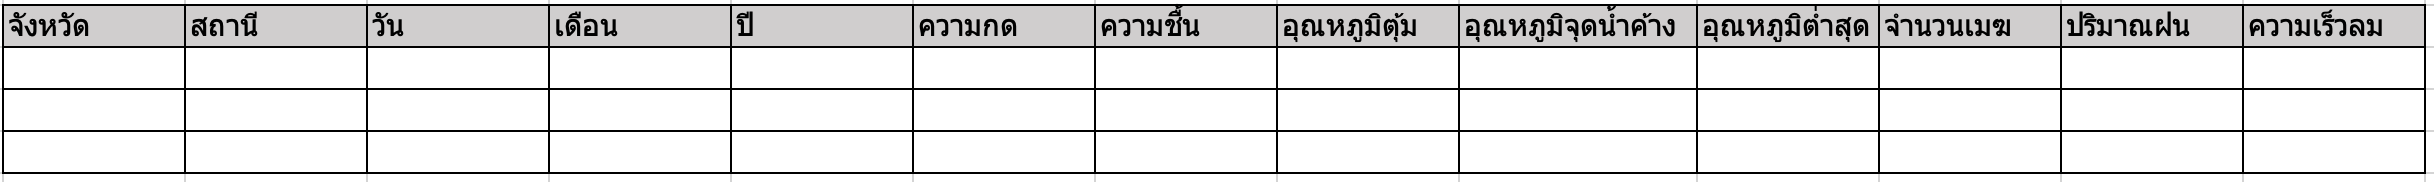

# import ข้อมูล

## ความกด

In [6]:
#เรียกใช้ไฟล์ เปลี่ยนชื่อ เก็บในตัวแปร

akkn = pd.read_excel('ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
anpm = pd.read_excel('ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
alei = pd.read_excel('ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
askn = pd.read_excel('ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
anki = pd.read_excel('ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})

ขอนแก่น kkn

In [7]:
a = str(akkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
akkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
akkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
akkn['จังหวัด'] = A 

In [8]:
ak = akkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [9]:
akn = ak.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
akn.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
akn = akn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]

นครพนม npm

In [10]:
a = str(anpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
anpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
anpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
anpm['จังหวัด'] = A 

In [11]:
an = anpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [12]:
ann = an.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
ann.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
ann = ann[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
ann.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,นครพนม,352201-หนองคาย จ.หนองคาย,1,10,2011,1006.3
1,นครพนม,352201-หนองคาย จ.หนองคาย,2,10,2011,1007.38
2,นครพนม,352201-หนองคาย จ.หนองคาย,3,10,2011,1008.07


เลย lei

In [13]:
a = str(alei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
alei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
alei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
alei['จังหวัด'] = A 

In [14]:
al = alei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [15]:
aln = al.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
aln.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
aln = aln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
ann.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,นครพนม,352201-หนองคาย จ.หนองคาย,1,10,2011,1006.3
1,นครพนม,352201-หนองคาย จ.หนองคาย,2,10,2011,1007.38
2,นครพนม,352201-หนองคาย จ.หนองคาย,3,10,2011,1008.07


สกลนคร skn

In [16]:
a = str(askn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
askn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
askn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
askn['จังหวัด'] = A 

In [17]:
ask = askn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [18]:
askn = ask.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
askn.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
askn = askn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
askn.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,สกลนคร,352201-หนองคาย จ.หนองคาย,1,10,2011,1005.84
1,สกลนคร,352201-หนองคาย จ.หนองคาย,2,10,2011,1007.16
2,สกลนคร,352201-หนองคาย จ.หนองคาย,3,10,2011,1007.87


หนองคาย nki

In [19]:
a = str(anki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
anki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
anki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
anki['จังหวัด'] = A 

In [20]:
ank = anki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [21]:
ankn = ank.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
ankn.rename(columns={'level_4': 'วัน', 0: 'ความกด'}, inplace=True)
ankn = ankn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความกด']]
ankn.head(3)

,จังหวัด,สถานี,วัน,เดือน,ปี,ความกด
0,หนองคาย,352201-หนองคาย จ.หนองคาย,1,10,2011,1005.34
1,หนองคาย,352201-หนองคาย จ.หนองคาย,2,10,2011,1006.67
2,หนองคาย,352201-หนองคาย จ.หนองคาย,3,10,2011,1007.39


## ความชื้นสัมพัทธ์

In [22]:
bkkn = pd.read_excel('ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
bnpm = pd.read_excel('ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
blei = pd.read_excel('ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
bskn = pd.read_excel('ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
bnki = pd.read_excel('ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})

ขอนแก่น kkn

In [23]:
a = str(bkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
bkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
bkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
bkkn['จังหวัด'] = A 

In [24]:
bk = bkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [25]:
bkn = bk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
bkn.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bkn = bkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

นครพนม npm

In [26]:
a = str(bnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
bnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
bnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
bnpm['จังหวัด'] = A 

In [27]:
bn = bnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [28]:
bnn = bn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
bnn.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bnn = bnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

เลย lei

In [29]:
a = str(blei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
blei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
blei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
blei['จังหวัด'] = A 

In [30]:
bl = blei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [31]:
bln = bl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
bln.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bln = bln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

สกลนคร skn

In [32]:
a = str(bskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
bskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
bskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
bskn['จังหวัด'] = A 

In [33]:
bsk = bskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [34]:
bskn = bsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
bskn.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bskn = bskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

หนองคาย nki

In [35]:
a = str(bnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
bnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
bnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
bnki['จังหวัด'] = A 

In [36]:
bnk = bnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [37]:
bnkn = bnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
bnkn.rename(columns={'level_4': 'วัน', 0: 'ความชื้นสัมพัทธ์'}, inplace=True)
bnkn = bnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความชื้นสัมพัทธ์']]

## ความเร็วลม

In [38]:
ckkn= pd.read_excel('ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
cnpm= pd.read_excel('ความเร็วลม(นอต)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
clei= pd.read_excel('ความเร็วลม(นอต)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
cskn= pd.read_excel('ความเร็วลม(นอต)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
cnki= pd.read_excel('ความเร็วลม(นอต)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})


ขอนแก่น kkn

In [39]:
a = str(ckkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
ckkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
ckkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
ckkn['จังหวัด'] = A 

In [40]:
ck = ckkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [41]:
ckn = ck.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
ckn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
ckn = ckn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

นครพนม npm

In [42]:
a = str(cnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
cnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
cnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
cnpm['จังหวัด'] = A 

In [43]:
cn = cnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [44]:
cnn = cn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cnn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cnn = cnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

เลย lei

In [45]:
a = str(clei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
clei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
clei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
clei['จังหวัด'] = A 

In [46]:
cl = clei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [47]:
cln = cl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cln.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cln = cln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

สกลนคร skn

In [48]:
a = str(cskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
cskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
cskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
cskn['จังหวัด'] = A 

In [49]:
csk = cskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [50]:
cskn = csk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cskn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cskn = cskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

หนองคาย nki

In [51]:
a = str(cnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
cnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
cnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
cnki['จังหวัด'] = A 

In [52]:
cnk = cnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [53]:
cnkn = cnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
cnkn.rename(columns={'level_4': 'วัน', 0: 'ความเร็วลม'}, inplace=True)
cnkn = cnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ความเร็วลม']]

## จำนวนเมฆ

In [54]:
dkkn= pd.read_excel('จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
dnpm= pd.read_excel('จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
dlei= pd.read_excel('จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
dskn= pd.read_excel('จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
dnki= pd.read_excel('จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})


ขอนแก่น kkn

In [55]:
a = str(dkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
dkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
dkkn['จังหวัด'] = A 

In [56]:
dk = dkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [57]:
dkn = dk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dkn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dkn = dkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

นครพนม npm

In [58]:
a = str(dnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
dnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
dnpm['จังหวัด'] = A 

In [59]:
dn = dnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [60]:
dnn = dn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dnn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dnn = dnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

เลย lei

In [61]:
a = str(dlei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dlei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
dlei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
dlei['จังหวัด'] = A 

In [62]:
dl = dlei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [63]:
dln = dl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dln.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dln = dln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

สกลนคร skn

In [64]:
a = str(dskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
dskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
dskn['จังหวัด'] = A 

In [65]:
dsk = dskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [66]:
dskn = dsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dskn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dskn = dskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

หนองคาย nki

In [67]:
a = str(dnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
dnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
dnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
dnki['จังหวัด'] = A 

In [68]:
dnk = dnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [69]:
dnkn = dnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
dnkn.rename(columns={'level_4': 'วัน', 0: 'จำนวนเมฆ'}, inplace=True)
dnkn = dnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'จำนวนเมฆ']]

## ปริมาณฝน

In [70]:
ekkn= pd.read_excel('ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
enpm= pd.read_excel('ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
elei= pd.read_excel('ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
eskn= pd.read_excel('ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
enki= pd.read_excel('ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})


ขอนแก่น kkn

In [71]:
a = str(ekkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
ekkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
ekkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
ekkn['จังหวัด'] = A 

In [72]:
ek = ekkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [73]:
ekn = ek.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
ekn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
ekn = ekn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

นครพนม npm

In [74]:
a = str(enpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
enpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
enpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
enpm['จังหวัด'] = A 

In [75]:
en = enpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [76]:
enn = en.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
enn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
enn = enn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

เลย lei

In [77]:
a = str(elei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
elei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
elei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
elei['จังหวัด'] = A 

In [78]:
el = elei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [79]:
eln = el.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
eln.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
eln = eln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

สกลนคร skn

In [80]:
a = str(eskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
eskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
eskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
eskn['จังหวัด'] = A 

In [81]:
esk = eskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [82]:
eskn = esk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
eskn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
eskn = eskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

หนองคาย nki

In [83]:
a = str(enki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
enki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
enki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
enki['จังหวัด'] = A 

In [84]:
enk = enki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [85]:
enkn = enk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
enkn.rename(columns={'level_4': 'วัน', 0: 'ปริมาณฝน'}, inplace=True)
enkn = enkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'ปริมาณฝน']]

## อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [86]:
fkkn= pd.read_excel('อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
fnpm= pd.read_excel('อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
flei= pd.read_excel('อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
fskn= pd.read_excel('อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
fnki= pd.read_excel('อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})


ขอนแก่น kkn

In [87]:
a = str(fkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
fkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
fkkn['จังหวัด'] = A 

In [88]:
fk = fkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [89]:
fkn = fk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fkn = fkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

นครพนม npm

In [90]:
a = str(fnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
fnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
fnpm['จังหวัด'] = A 

In [91]:
fn = fnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [92]:
fnn = fn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fnn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fnn = fnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

เลย lei

In [93]:
a = str(flei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
flei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
flei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
flei['จังหวัด'] = A 

In [94]:
fl = flei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [95]:
fln = fl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fln.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fln = fln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

สกลนคร skn

In [96]:
a = str(fskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
fskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
fskn['จังหวัด'] = A 

In [97]:
fsk = fskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [98]:
fskn = fsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fskn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fskn = fskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

หนองคาย nki

In [99]:
a = str(fnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
fnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
fnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
fnki['จังหวัด'] = A 

In [100]:
fnk = fnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [101]:
fnkn = fnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
fnkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิจุดน้ำค้าง'}, inplace=True)
fnkn = fnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิจุดน้ำค้าง']]

## อุณหภูมิต่ำสุด(เซลเซียส)

In [102]:
gkkn= pd.read_excel('อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
gnpm= pd.read_excel('อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
glei= pd.read_excel('อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
gskn= pd.read_excel('อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
gnki= pd.read_excel('อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})


ขอนแก่น kkn

In [103]:
a = str(gkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
gkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
gkkn['จังหวัด'] = A 

In [104]:
gk = gkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [105]:
gkn = gk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gkn = gkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

นครพนม npm

In [106]:
a = str(gnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
gnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
gnpm['จังหวัด'] = A 

In [107]:
gn = gnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [108]:
gnn = gn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gnn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gnn = gnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

เลย lei

In [109]:
a = str(glei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
glei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
glei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
glei['จังหวัด'] = A 

In [110]:
gl = glei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [111]:
gln = gl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gln.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gln = gln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

สกลนคร skn

In [112]:
a = str(gskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
gskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
gskn['จังหวัด'] = A 

In [113]:
gsk = gskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [114]:
gskn = gsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gskn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gskn = gskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

หนองคาย nki

In [115]:
a = str(gnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
gnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
gnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
gnki['จังหวัด'] = A 

In [116]:
gnk = gnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [117]:
gnkn = gnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
gnkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิต่ำสุด'}, inplace=True)
gnkn = gnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิต่ำสุด']]

## อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [118]:
hkkn= pd.read_excel('อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
hnpm= pd.read_excel('อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
hlei= pd.read_excel('อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
hskn= pd.read_excel('อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})
hnki= pd.read_excel('อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',sheet_name='Sheet1',skiprows=4).rename(columns={'Unnamed: 0' : 'ที่', 'Unnamed: 1' : 'สถานี', 'Unnamed: 2' : 'เดือน/ปี', 'Unnamed: 34' : 'เฉลี่ย'})


ขอนแก่น kkn

In [119]:
a = str(hkkn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hkkn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
hkkn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('ขอนแก่น')
hkkn['จังหวัด'] = A 

In [120]:
hk = hkkn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [121]:
hkn = hk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hkn = hkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

นครพนม npm

In [122]:
a = str(hnpm['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hnpm['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
hnpm['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('นครพนม')
hnpm['จังหวัด'] = A 

In [123]:
hn = hnpm[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [124]:
hnn = hn.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hnn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hnn = hnn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

เลย lei

In [125]:
a = str(hlei['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hlei['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
hlei['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('เลย')
hlei['จังหวัด'] = A 

In [126]:
hl = hlei[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [127]:
hln = hl.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hln.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hln = hln[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

สกลนคร skn

In [128]:
a = str(hskn['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hskn['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
hskn['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('สกลนคร')
hskn['จังหวัด'] = A 

In [129]:
hsk = hskn[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [130]:
hskn = hsk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hskn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hskn = hskn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

หนองคาย nki

In [131]:
a = str(hnki['เดือน/ปี']).split('\n')
a.pop()

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย - แล้วตั้งชื่อว่า res
    resSp = res[0].split('   ')
    A.append(resSp[1])
hnki['ปี'] = A # ตั้งชื่อคอลัมน์ว่า ปี แล้วเก็บในตาราง

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    res = i.split('-') # split ใช้สำหรับแยก โดยในที่นี้แยกด้วย / แล้วตั้งชื่อว่า res    
    A.append(res[1])
hnki['เดือน'] = A

A = list() # สร้างตัวแปร A มาเก็บ list ว่าง
for i in a: # วนลูปใน list
    A.append('หนองคาย')
hnki['จังหวัด'] = A 

In [132]:
hnk = hnki[['จังหวัด','สถานี','เดือน', 'ปี',    1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23,         24,         25,         26,         27,
               28,         29,         30,         31,    ]]

In [133]:
hnkn = hnk.set_index(['จังหวัด','สถานี','เดือน','ปี']).stack().reset_index()
hnkn.rename(columns={'level_4': 'วัน', 0: 'อุณหภูมิตุ้มแห้ง'}, inplace=True)
hnkn = hnkn[['จังหวัด','สถานี','วัน','เดือน',  'ปี', 'อุณหภูมิตุ้มแห้ง']]

# concat

ความกด

In [134]:
framesa = [akn, ann, aln, askn, ankn] 
a = pd.concat(framesa)

ความชื้นสัมพัทธ์

In [135]:
framesb = [bkn, bnn, bln, bskn, bnkn]
b = pd.concat(framesb)

ความเร็วลม

In [136]:
framesc = [ckn, cnn, cln, cskn, cnkn]
c = pd.concat(framesc)

จำนวนเมฆ

In [137]:
framesd = [dkn, dnn, dln, dskn, dnkn]
d = pd.concat(framesd)

ปริมาณเมฆ

In [138]:
framese = [ekn, enn, eln, eskn, enkn]
e = pd.concat(framese)

อุณหภูมิจุดน้ำค้าง

In [139]:
framesf = [fkn, fnn, fln, fskn, fnkn]
f = pd.concat(framesf)

อุณหภูมิต่ำสุด

In [140]:
framesg = [gkn, gnn, gln, gskn, gnkn]
g = pd.concat(framesg)

อุณหภูมิตุ้มแห้ง

In [141]:
framesh = [hkn, hnn, hln, hskn, hnkn]
h = pd.concat(framesh)

# merge

In [142]:
#table_merge = a.merge(b,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(c,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(d,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(e,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(f,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(g,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(h,on=['วัน', 'เดือน', 'ปี','จังหวัด',])
#table_merge.shape
#table_merge.head(3)

In [143]:
table_merge1 = a.merge(b,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).rename(columns={'สถานี_x':'สถานีความกด','สถานี_y':'สถานีความชื้น'})

In [144]:
table_merge2 = table_merge1.merge(c,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(d,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).rename(columns={'สถานี_x':'สถานีความเร็วลม', 'สถานี_y':'สถานีจำนวนเมฆ'})

In [145]:
table_merge3 = table_merge2.merge(e,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(f,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).rename(columns={ 'สถานี_x':'สถานีปริมาณฝน','สถานี_y':'สถานีอุณหภูมิจุดน้ำค้าง'})

In [146]:
table_merge4 = table_merge3.merge(g,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).merge(h,on=['วัน', 'เดือน', 'ปี','จังหวัด',]).rename(columns={ 'สถานี_x':'สถานีอุณหภูมิต่ำสุด','สถานี_y':'สถานีอุณหภูมิตุ้มแห้ง'})

# เสร็จแล้ว!!!!!!!!!!!!!!!!!

In [147]:
table_merge4.columns

Index(['จังหวัด', 'สถานีความกด', 'วัน', 'เดือน', 'ปี', 'ความกด',
       'สถานีความชื้น', 'ความชื้นสัมพัทธ์', 'สถานีความเร็วลม', 'ความเร็วลม',
       'สถานีจำนวนเมฆ', 'จำนวนเมฆ', 'สถานีปริมาณฝน', 'ปริมาณฝน',
       'สถานีอุณหภูมิจุดน้ำค้าง', 'อุณหภูมิจุดน้ำค้าง', 'สถานีอุณหภูมิต่ำสุด',
       'อุณหภูมิต่ำสุด', 'สถานีอุณหภูมิตุ้มแห้ง', 'อุณหภูมิตุ้มแห้ง'],
      dtype='object')

In [148]:
table_merge4 = table_merge4[['จังหวัด', 'วัน', 'เดือน', 'ปี','สถานีความกด','ความกด',
       'สถานีความชื้น', 'ความชื้นสัมพัทธ์', 'สถานีความเร็วลม', 'ความเร็วลม',
       'สถานีจำนวนเมฆ', 'จำนวนเมฆ', 'สถานีปริมาณฝน', 'ปริมาณฝน',
       'สถานีอุณหภูมิจุดน้ำค้าง', 'อุณหภูมิจุดน้ำค้าง', 'สถานีอุณหภูมิต่ำสุด',
       'อุณหภูมิต่ำสุด', 'สถานีอุณหภูมิตุ้มแห้ง', 'อุณหภูมิตุ้มแห้ง']]
table_merge4

,จังหวัด,วัน,เดือน,ปี,สถานีความกด,ความกด,สถานีความชื้น,ความชื้นสัมพัทธ์,สถานีความเร็วลม,ความเร็วลม,สถานีจำนวนเมฆ,จำนวนเมฆ,สถานีปริมาณฝน,ปริมาณฝน,สถานีอุณหภูมิจุดน้ำค้าง,อุณหภูมิจุดน้ำค้าง,สถานีอุณหภูมิต่ำสุด,อุณหภูมิต่ำสุด,สถานีอุณหภูมิตุ้มแห้ง,อุณหภูมิตุ้มแห้ง
0,ขอนแก่น,1,10,2011,352201-หนองคาย จ.หนองคาย,1005.47,381201-ขอนแก่น จ.ขอนแก่น,83,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,9,381201-ขอนแก่น จ.ขอนแก่น,1.4,381201-ขอนแก่น จ.ขอนแก่น,24.2,381201-ขอนแก่น จ.ขอนแก่น,24.8,381201-ขอนแก่น จ.ขอนแก่น,27.6
1,ขอนแก่น,2,10,2011,352201-หนองคาย จ.หนองคาย,1006.65,381201-ขอนแก่น จ.ขอนแก่น,92,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,17.7,381201-ขอนแก่น จ.ขอนแก่น,24.0,381201-ขอนแก่น จ.ขอนแก่น,23.0,381201-ขอนแก่น จ.ขอนแก่น,25.6
2,ขอนแก่น,3,10,2011,352201-หนองคาย จ.หนองคาย,1007.49,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,3,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,3,381201-ขอนแก่น จ.ขอนแก่น,22.9,381201-ขอนแก่น จ.ขอนแก่น,22.1,381201-ขอนแก่น จ.ขอนแก่น,25.6
3,ขอนแก่น,4,10,2011,352201-หนองคาย จ.หนองคาย,1008.28,381201-ขอนแก่น จ.ขอนแก่น,80,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,8,381201-ขอนแก่น จ.ขอนแก่น,0,381201-ขอนแก่น จ.ขอนแก่น,21.9,381201-ขอนแก่น จ.ขอนแก่น,22.8,381201-ขอนแก่น จ.ขอนแก่น,25.8
4,ขอนแก่น,5,10,2011,352201-หนองคาย จ.หนองคาย,1009.88,381201-ขอนแก่น จ.ขอนแก่น,86,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,10,381201-ขอนแก่น จ.ขอนแก่น,2.2,381201-ขอนแก่น จ.ขอนแก่น,21.7,381201-ขอนแก่น จ.ขอนแก่น,23.1,381201-ขอนแก่น จ.ขอนแก่น,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,หนองคาย,27,02,2022,352201-หนองคาย จ.หนองคาย,1015.31,352201-หนองคาย จ.หนองคาย,62,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,3,352201-หนองคาย จ.หนองคาย,0,352201-หนองคาย จ.หนองคาย,15.8,352201-หนองคาย จ.หนองคาย,17.5,352201-หนองคาย จ.หนองคาย,23.8
8360,หนองคาย,28,02,2022,352201-หนองคาย จ.หนองคาย,1013.06,352201-หนองคาย จ.หนองคาย,65,353301-เลย สกษ. จ.เลย,2,353301-เลย สกษ. จ.เลย,2,352201-หนองคาย จ.หนองคาย,0,352201-หนองคาย จ.หนองคาย,17.8,352201-หนองคาย จ.หนองคาย,19,352201-หนองคาย จ.หนองคาย,25.4
8361,หนองคาย,29,02,2022,352201-หนองคาย จ.หนองคาย,-,352201-หนองคาย จ.หนองคาย,-,353301-เลย สกษ. จ.เลย,-,353301-เลย สกษ. จ.เลย,1,352201-หนองคาย จ.หนองคาย,-,352201-หนองคาย จ.หนองคาย,16.6,352201-หนองคาย จ.หนองคาย,-,352201-หนองคาย จ.หนองคาย,-
8362,หนองคาย,30,02,2022,352201-หนองคาย จ.หนองคาย,-,352201-หนองคาย จ.หนองคาย,-,353301-เลย สกษ. จ.เลย,-,353301-เลย สกษ. จ.เลย,1,352201-หนองคาย จ.หนองคาย,-,352201-หนองคาย จ.หนองคาย,14.9,352201-หนองคาย จ.หนองคาย,-,352201-หนองคาย จ.หนองคาย,-
